In [1]:
### Importing packages for data analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('bikers_semi_final.csv', low_memory=False)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO_x,CRASH_DATE_x,CITY,STATE,ZIPCODE,SEX,AGE,SAFETY_EQUIPMENT,EJECTION,INJURY_CLASSIFICATION,HOSPITAL,EMS_AGENCY,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE,RD_NO_y,CRASH_DATE_EST_I,CRASH_DATE_y,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,CRASH_UNIT_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID_y,CMRC_VEH_I,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,TOWED_I,FIRE_I,OCCUPANT_CNT,EXCEED_SPEED_LIMIT_I,TOWED_BY,TOWED_TO,AREA_00_I,AREA_01_I,AREA_02_I,AREA_03_I,AREA_04_I,AREA_05_I,AREA_06_I,AREA_07_I,AREA_08_I,AREA_09_I,AREA_10_I,AREA_11_I,AREA_12_I,AREA_99_I,FIRST_CONTACT_POINT,CMV_ID,USDOT_NO,CCMC_NO,ILCC_NO,COMMERCIAL_SRC,GVWR,CARRIER_NAME,CARRIER_STATE,CARRIER_CITY,HAZMAT_PRESENT_I,HAZMAT_REPORT_I,MCS_REPORT_I,HAZMAT_VIO_CAUSE_CRASH_I,MCS_VIO_CAUSE_CRASH_I,TRAILER1_WIDTH,TRAILER1_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS,INJURY_BAD,HELMET_USED,age_bins,SAFE_PEDAL_ACTION,PROTECTIVE_CLOTHING,SAFE_LOCATION,WEATHER_CAT,road_surf_bins,DAYTIME,SPEED_RATING,UNSAFE_ACTION,DRIVER_BLIND,cause_bins,driver_maneuver_bins,physical_bins,hour_bins
0,0,0,O838337,BICYCLE,03204df22743eb4559749b8e3966c471a544228aa0fe9c...,JD144885,02/08/2020 05:04:00 PM,CHICAGO,IL,60628,F,43.0,HELMET NOT USED,TOTALLY EJECTED,NONINCAPACITATING INJURY,NaN,CFD 58,NONE,NOT OBSCURED,NORMAL,OTHER ACTION,NO CONTRASTING CLOTHING,DRIVEWAY ACCESS,TEST NOT OFFERED,NaN,NaN,JD144885,NaN,02/08/2020 05:04:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,Y,$500 OR LESS,02/08/2020 05:10:00 PM,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,2908,W,63RD ST,823.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,17,7,2,41.779184,-87.696231,POINT (-87.696230849024 41.77918426187),838336,JD144885,02/08/2020 05:04:00 PM,1,DRIVER,NaN,795558.0,NaN,HONDA,Odyssey (minivan),IL,2002.0,NONE,VAN/MINI-VAN,PERSONAL,S,TURNING LEFT,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Middle-aged,0.0,0.0,1.0,Clear Weather,Dry,1,Average Speed,Unknown,0.0,Skill,Turning Maneuver,Normal,Afternoon
1,1,2,O874505,BICYCLE,0d5d0bebc62e6653d10db0187013c73349440dd237356b...,JD214394,04/22/2020 09:32:00 AM,CHICAGO,IL,60632,M,22.0,HELMET NOT USED,PARTIALLY EJECTED,NONINCAPACITATING INJURY,NaN,AMB 34,OTHER,NOT OBSCURED,NORMAL,OTHER ACTION,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED,NaN,NaN,JD214394,NaN,04/22/2020 09:32:00 AM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLOUDY/OVERCAST,DAYLIGHT,PEDALCYCLIST,FOUR WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"$501 - $1,500",04/22/2020 09:34:00 AM,FAILING TO YIELD RIGHT-OF-WAY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,3600,S,ROCKWELL ST,911.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,2.0,0.0,9,4,4

In [5]:
pd.reset_option('max_columns')

In [6]:
df_clean = df[['INJURY_BAD','HELMET_USED','age_bins','SAFE_PEDAL_ACTION','PROTECTIVE_CLOTHING','SAFE_LOCATION','WEATHER_CAT','road_surf_bins','DAYTIME','SPEED_RATING','UNSAFE_ACTION','DRIVER_BLIND','cause_bins','driver_maneuver_bins','physical_bins','hour_bins']]

#y = df['INJURY_BAD']

In [7]:
X.head()

,HELMET_USED,age_bins,SAFE_PEDAL_ACTION,PROTECTIVE_CLOTHING,SAFE_LOCATION,WEATHER_CAT,road_surf_bins,DAYTIME,SPEED_RATING,UNSAFE_ACTION,DRIVER_BLIND,cause_bins,driver_maneuver_bins,physical_bins,hour_bins
0,0.0,Middle-aged,0.0,0.0,1.0,Clear Weather,Dry,1,Average Speed,Unknown,0.0,Skill,Turning Maneuver,Normal,Afternoon
1,0.0,Adult,0.0,0.0,0.0,Clear Weather,Dry,1,Average Speed,Unknown,0.0,Skill,Turning Maneuver,Normal,Morning
2,1.0,Adult,1.0,1.0,1.0,Clear Weather,Unknown,0,Average Speed,Unknown,Unknown,Reckless,Traffic Maneuver,Other,Night
3,1.0,Adult,0.0,1.0,Unknown,Clear Weather,Dry,1,Below Average Speed,Unknown,Unknown,NaN,Stationary Object Maneuver,Shaken,Afternoon
4,0.0,Adult,0.0,0.0,0.0,Clear Weather,Dry,1,Average Speed,Unknown,Unknown,Skill,Unknown,Other,Afternoon


In [8]:
X = X.replace(('0.0'),0.0)
X = X.replace(('1.0'),1.0)


X.head()

,HELMET_USED,age_bins,SAFE_PEDAL_ACTION,PROTECTIVE_CLOTHING,SAFE_LOCATION,WEATHER_CAT,road_surf_bins,DAYTIME,SPEED_RATING,UNSAFE_ACTION,DRIVER_BLIND,cause_bins,driver_maneuver_bins,physical_bins,hour_bins
0,0,Middle-aged,0,0.0,1,Clear Weather,Dry,1,Average Speed,Unknown,0,Skill,Turning Maneuver,Normal,Afternoon
1,0,Adult,0,0.0,0,Clear Weather,Dry,1,Average Speed,Unknown,0,Skill,Turning Maneuver,Normal,Morning
2,1,Adult,1,1.0,1,Clear Weather,Unknown,0,Average Speed,Unknown,Unknown,Reckless,Traffic Maneuver,Other,Night
3,1,Adult,0,1.0,Unknown,Clear Weather,Dry,1,Below Average Speed,Unknown,Unknown,NaN,Stationary Object Maneuver,Shaken,Afternoon
4,0,Adult,0,0.0,0,Clear Weather,Dry,1,Average Speed,Unknown,Unknown,Skill,Unknown,Other,Afternoon


In [39]:
X[['HELMET_USED','SAFE_PEDAL_ACTION','PROTECTIVE_CLOTHING','SAFE_LOCATION','DRIVER_BLIND']] = X[['HELMET_USED','SAFE_PEDAL_ACTION','PROTECTIVE_CLOTHING','SAFE_LOCATION','DRIVER_BLIND']].replace('Unknown',100).fillna(100).astype(int)


In [40]:
#X[['age_bins','PEDAL_ACTION','WEATHER_CAT','road_surf_bins','SPEED_RATING','cause_bins','driver_maneuver_bins','physical_bins','hour_bins']]

X = pd.get_dummies(X, columns=['age_bins','SAFE_PEDAL_ACTION','WEATHER_CAT','road_surf_bins','SPEED_RATING','cause_bins','driver_maneuver_bins','physical_bins','hour_bins','UNSAFE_ACTION'])


X.head()

,HELMET_USED,PROTECTIVE_CLOTHING,SAFE_LOCATION,DAYTIME,DRIVER_BLIND,age_bins_Adolescent,age_bins_Adult,age_bins_Elderly,age_bins_Middle-aged,age_bins_Unknown,...,physical_bins_Shaken,physical_bins_Unknown,hour_bins_Afternoon,hour_bins_Early Morning,hour_bins_Morning,hour_bins_Night,UNSAFE_ACTION_DISTRACTION,UNSAFE_ACTION_DRIVER ERROR,UNSAFE_ACTION_RECKLESS,UNSAFE_ACTION_Unknown
0,0,0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,1,1,0,100,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,1,100,1,100,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
4,0,0,0,1,100,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=312)



In [42]:
#df = df.drop(df[df.eq('Unknown').any(axis=1)].index) 


In [43]:
X.isna().sum()


HELMET_USED                                        0
PROTECTIVE_CLOTHING                                0
SAFE_LOCATION                                      0
DAYTIME                                            0
DRIVER_BLIND                                       0
age_bins_Adolescent                                0
age_bins_Adult                                     0
age_bins_Elderly                                   0
age_bins_Middle-aged                               0
age_bins_Unknown                                   0
SAFE_PEDAL_ACTION_0                                0
SAFE_PEDAL_ACTION_1                                0
SAFE_PEDAL_ACTION_100                              0
WEATHER_CAT_Adverse Weather                        0
WEATHER_CAT_Clear Weather                          0
WEATHER_CAT_Not Available                          0
road_surf_bins_Dry                                 0
road_surf_bins_Other                               0
road_surf_bins_Snow                           

In [44]:
import numpy as np

X.replace([np.inf, -np.inf], np.nan, inplace=True)


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [46]:
print("Train: ", y_train.value_counts(normalize=True)[1])

print("Test: ", y_test.value_counts(normalize=True)[1])

Train:  0.0995114006514658
Test:  0.09130859375


In [47]:
X.isna().sum()


HELMET_USED                                        0
PROTECTIVE_CLOTHING                                0
SAFE_LOCATION                                      0
DAYTIME                                            0
DRIVER_BLIND                                       0
age_bins_Adolescent                                0
age_bins_Adult                                     0
age_bins_Elderly                                   0
age_bins_Middle-aged                               0
age_bins_Unknown                                   0
SAFE_PEDAL_ACTION_0                                0
SAFE_PEDAL_ACTION_1                                0
SAFE_PEDAL_ACTION_100                              0
WEATHER_CAT_Adverse Weather                        0
WEATHER_CAT_Clear Weather                          0
WEATHER_CAT_Not Available                          0
road_surf_bins_Dry                                 0
road_surf_bins_Other                               0
road_surf_bins_Snow                           

In [48]:
from sklearn.tree import DecisionTreeClassifier

dtc_baseline = DecisionTreeClassifier(max_depth=2,random_state=310)

dtc_baseline

DecisionTreeClassifier(max_depth=2, random_state=310)

In [49]:
dtc_baseline.fit(X_train, y_train)

plot_tree(dtc_baseline)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss

dtc_baseline.fit(X_train_scaled, y_train)

preds = dtc_baseline.predict(X_test_scaled)

probs = dtc_baseline.predict_proba(X_test_scaled)


In [ ]:
print("log loss: ", log_loss(y_test, probs))

print("accuracy: ", accuracy_score(y_test, preds))

print("precision:", precision_score(y_test, preds))

print("recall:   ", recall_score(y_test, preds))

In [7]:
df = df.replace(('Unknown','UNKNOWN'), None)

In [8]:
df.isna().sum()

Unnamed: 0                           0
Unnamed: 0.1                         0
PERSON_ID                            0
PERSON_TYPE                          0
CRASH_RECORD_ID                      0
RD_NO_x                             21
CRASH_DATE_x                         0
CITY                              1438
STATE                             1538
ZIPCODE                           2918
SEX                                144
AGE                               1521
SAFETY_EQUIPMENT                   134
EJECTION                           356
INJURY_CLASSIFICATION                2
HOSPITAL                          5074
EMS_AGENCY                        5923
DRIVER_ACTION                      245
DRIVER_VISION                      341
PHYSICAL_CONDITION                 223
PEDPEDAL_ACTION                      2
PEDPEDAL_VISIBILITY                  2
PEDPEDAL_LOCATION                    2
BAC_RESULT                         353
BAC_RESULT VALUE                 10236
CELL_PHONE_USE           

In [54]:
df = df.dropna()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Columns: 152 entries, Unnamed: 0 to hour_bins
dtypes: float64(24), int64(11), object(117)
memory usage: 0.0+ bytes


In [7]:
df['UNSAFE_ACTION'].value_counts()

Unknown         8042
DRIVER ERROR    1111
RECKLESS         867
DISTRACTION       20
Name: UNSAFE_ACTION, dtype: int64

In [7]:
df_clean = df_clean.replace('Unknown',None)


In [8]:
df_clean = df_clean.replace('Unknown ',None)
df_clean = df_clean.replace(' Unknown',None)

In [10]:
#for col in df_clean.columns:
#    count = (df_clean[col] == 'Unknown').sum()
#    print(f"{col}: {count}") 

INJURY_BAD: 0
HELMET_USED: 0
age_bins: 0
SAFE_PEDAL_ACTION: 0
PROTECTIVE_CLOTHING: 0
SAFE_LOCATION: 0
WEATHER_CAT: 0
road_surf_bins: 0
DAYTIME: 0
SPEED_RATING: 0
UNSAFE_ACTION: 8
DRIVER_BLIND: 0
cause_bins: 0
driver_maneuver_bins: 0
physical_bins: 0
hour_bins: 0


In [9]:
df_clean.isna().sum()

INJURY_BAD                 2
HELMET_USED              175
age_bins                   0
SAFE_PEDAL_ACTION          3
PROTECTIVE_CLOTHING        2
SAFE_LOCATION              2
WEATHER_CAT                0
road_surf_bins             0
DAYTIME                    0
SPEED_RATING               0
UNSAFE_ACTION            905
DRIVER_BLIND             341
cause_bins              4435
driver_maneuver_bins       0
physical_bins              0
hour_bins                  0
dtype: int64

In [9]:
df_clean['UNSAFE_ACTION'].value_counts()

DRIVER ERROR    5288
RECKLESS        3959
DISTRACTION       78
Unknown            8
Name: UNSAFE_ACTION, dtype: int64

In [10]:
df_clean = df_clean.drop(range(8))

In [14]:
df['UNSAFE_ACTION']

0             Unknown
1             Unknown
2             Unknown
3             Unknown
4             Unknown
5             Unknown
6             Unknown
7             Unknown
8        DRIVER ERROR
9             Unknown
10            Unknown
11       DRIVER ERROR
12            Unknown
13            Unknown
14       DRIVER ERROR
15            Unknown
16           RECKLESS
17            Unknown
18            Unknown
19       DRIVER ERROR
20           RECKLESS
21            Unknown
22           RECKLESS
23            Unknown
24            Unknown
25           RECKLESS
26            Unknown
27            Unknown
28            Unknown
29            Unknown
30            Unknown
31            Unknown
32            Unknown
33            Unknown
34            Unknown
35            Unknown
36            Unknown
37           RECKLESS
38       DRIVER ERROR
39            Unknown
40            Unknown
41            Unknown
42            Unknown
43            Unknown
44            Unknown
45        

In [17]:
len(df['UNSAFE_ACTION'])

10238

In [18]:
len(df_clean['UNSAFE_ACTION'])

10230

In [19]:
df_clean.isna().sum()

INJURY_BAD                 2
HELMET_USED              175
age_bins                   0
SAFE_PEDAL_ACTION          3
PROTECTIVE_CLOTHING        2
SAFE_LOCATION              2
WEATHER_CAT                0
road_surf_bins             0
DAYTIME                    0
SPEED_RATING               0
UNSAFE_ACTION            905
DRIVER_BLIND             341
cause_bins              4431
driver_maneuver_bins       0
physical_bins              0
hour_bins                  0
dtype: int64

In [12]:
df_clean['UNSAFE_ACTION'].value_counts()

DRIVER ERROR    5288
RECKLESS        3959
DISTRACTION       78
Name: UNSAFE_ACTION, dtype: int64

In [9]:
#df_clean = df_clean.dropna()

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10238 entries, 0 to 10237
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   INJURY_BAD            10236 non-null  float64
 1   HELMET_USED           10063 non-null  object 
 2   age_bins              10238 non-null  object 
 3   SAFE_PEDAL_ACTION     10235 non-null  object 
 4   PROTECTIVE_CLOTHING   10236 non-null  float64
 5   SAFE_LOCATION         10236 non-null  object 
 6   WEATHER_CAT           10238 non-null  object 
 7   road_surf_bins        10238 non-null  object 
 8   DAYTIME               10238 non-null  int64  
 9   SPEED_RATING          10238 non-null  object 
 10  UNSAFE_ACTION         9333 non-null   object 
 11  DRIVER_BLIND          9897 non-null   object 
 12  cause_bins            5803 non-null   object 
 13  driver_maneuver_bins  10238 non-null  object 
 14  physical_bins         10238 non-null  object 
 15  hour_bins          

In [23]:
#df_clean = df_clean.replace(('Unknown','UNKNOWN'), None)

In [24]:
df_clean = df_clean.drop('cause_bins', axis=1)

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10238 entries, 0 to 10237
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   INJURY_BAD            10236 non-null  float64
 1   HELMET_USED           10063 non-null  object 
 2   age_bins              10238 non-null  object 
 3   SAFE_PEDAL_ACTION     10235 non-null  object 
 4   PROTECTIVE_CLOTHING   10236 non-null  float64
 5   SAFE_LOCATION         10236 non-null  object 
 6   WEATHER_CAT           10238 non-null  object 
 7   road_surf_bins        10238 non-null  object 
 8   DAYTIME               10238 non-null  int64  
 9   SPEED_RATING          10238 non-null  object 
 10  UNSAFE_ACTION         9333 non-null   object 
 11  DRIVER_BLIND          9897 non-null   object 
 12  driver_maneuver_bins  10238 non-null  object 
 13  physical_bins         10238 non-null  object 
 14  hour_bins             10238 non-null  object 
dtypes: float64(2), int6

In [26]:
df_clean = df_clean.dropna()

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9042 entries, 0 to 10237
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   INJURY_BAD            9042 non-null   float64
 1   HELMET_USED           9042 non-null   object 
 2   age_bins              9042 non-null   object 
 3   SAFE_PEDAL_ACTION     9042 non-null   object 
 4   PROTECTIVE_CLOTHING   9042 non-null   float64
 5   SAFE_LOCATION         9042 non-null   object 
 6   WEATHER_CAT           9042 non-null   object 
 7   road_surf_bins        9042 non-null   object 
 8   DAYTIME               9042 non-null   int64  
 9   SPEED_RATING          9042 non-null   object 
 10  UNSAFE_ACTION         9042 non-null   object 
 11  DRIVER_BLIND          9042 non-null   object 
 12  driver_maneuver_bins  9042 non-null   object 
 13  physical_bins         9042 non-null   object 
 14  hour_bins             9042 non-null   object 
dtypes: float64(2), int64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

y = df_clean['INJURY_BAD']
X = df_clean.drop('INJURY_BAD',axis=1)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=312)

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

X_encoded = ohe.fit_transform(X_train)

dt = DecisionTreeClassifier(max_depth=3,random_state=312,class_weight='balanced')

dt.fit(X_encoded,y_train)
DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=312)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=312)

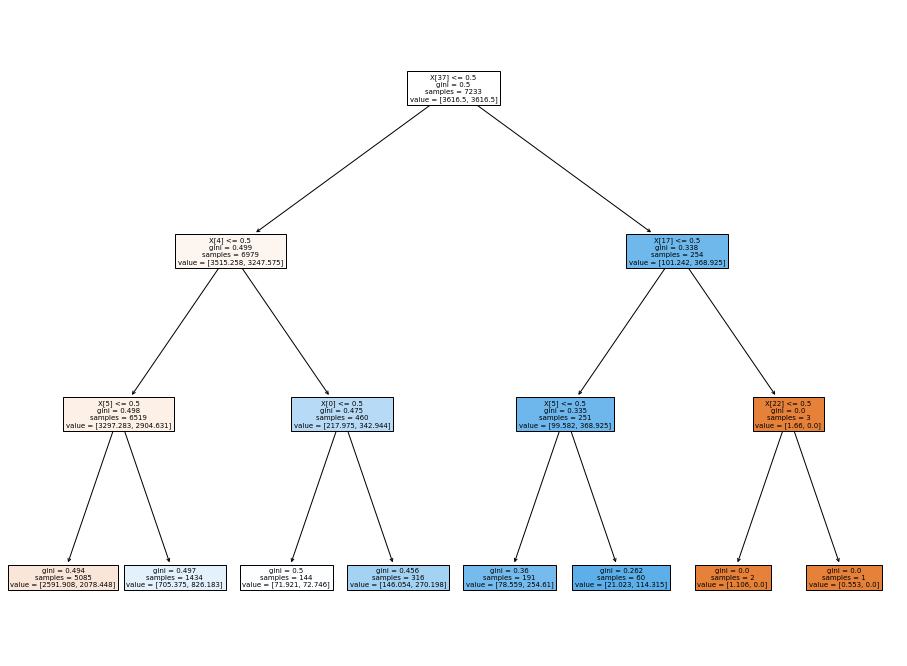

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
plot_tree(dt, filled=True)
plt.show()